# Introductory examples

## 1.usa.gov data from bit.ly

In [88]:
%pwd

u'/Users/thomas_young/Documents/git_download/pydata-book'

In [89]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [90]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [91]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [92]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [93]:
records[0]['tz']

u'America/New_York'

In [94]:
print(records[0]['tz'])

America/New_York


In [95]:
uyangkai = u'测试'
byangkai = uyangkai.encode('gbk')
print(byangkai)
print(uyangkai)

����
测试


In [96]:
print(uyangkai)
print(byangkai)

测试
����


In [97]:
uyangkai

u'\u6d4b\u8bd5'

In [98]:
byangkai

'\xb2\xe2\xca\xd4'

In [99]:
byangkai.decode('gbk') == uyangkai

True

In [100]:
x = '%s a %s' % (u'杨恺'.encode('utf8'), 'x')
print(x)
import sys
print(sys.getdefaultencoding())

杨恺 a x
ascii


### Counting time zones in pure Python

In [101]:
# time_zones = [rec['tz'] for rec in records]

In [102]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [103]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [104]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [105]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [106]:
counts = get_counts(time_zones)

In [107]:
counts['America/New_York']

1251

In [108]:
len(time_zones)

3440

In [109]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [110]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [111]:
from collections import Counter

In [112]:
counts = Counter(time_zones)

In [113]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### Counting time zones with pandas

In [114]:
%matplotlib inline

In [115]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [116]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path).readlines()
records = [json.loads(line) for line in lines]

In [117]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [118]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [119]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [120]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [121]:
plt.figure(figsize=(10, 4))

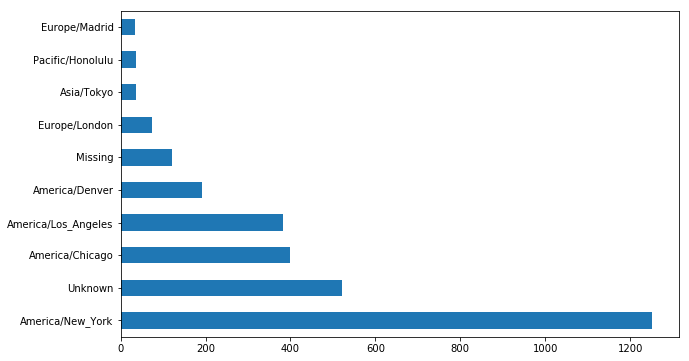

In [122]:
tz_counts[:10].plot(kind='barh', rot=0)

In [123]:
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [124]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [125]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [126]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [127]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [128]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [129]:
cframe = frame[frame.a.notnull()]

In [130]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='|S11')

In [131]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [132]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [133]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [134]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [135]:
plt.figure()

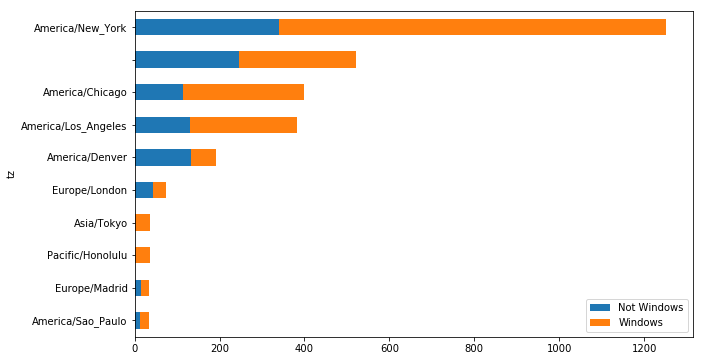

In [136]:
count_subset.plot(kind='barh', stacked=True)

In [137]:
plt.figure()

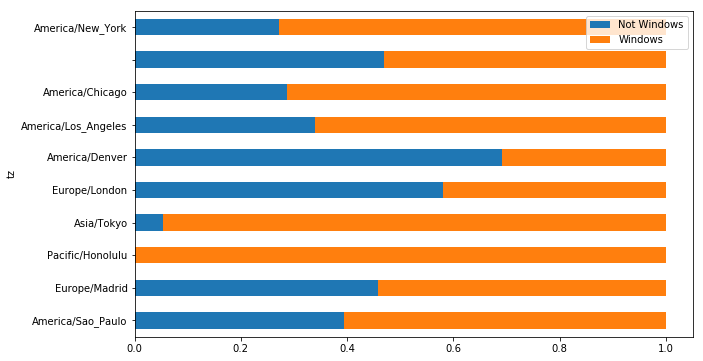

In [138]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M data set

In [227]:
import pandas as pd
import os
encoding = 'latin1'

upath = os.path.expanduser('ch02/movielens/users.dat')
rpath = os.path.expanduser('ch02/movielens/ratings.dat')
mpath = os.path.expanduser('ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

/Users/thomas_young/miniconda3/envs/bunnies/lib/python2.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]
/Users/thomas_young/miniconda3/envs/bunnies/lib/python2.7/site-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/Users/thomas_young/miniconda3/envs/bunnies/lib/python2.7/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning

In [228]:
!head -5 $upath

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455


In [229]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [230]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [231]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [232]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [235]:
data = pd.merge(pd.merge(ratings, users), movies)
data[10000:10005]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
10000,4714,2804,3,963446973,M,50,1,55405,"Christmas Story, A (1983)",Comedy|Drama
10001,4715,2804,5,963444852,M,25,2,97205,"Christmas Story, A (1983)",Comedy|Drama
10002,4732,2804,5,963407540,M,25,14,24450,"Christmas Story, A (1983)",Comedy|Drama
10003,4739,2804,5,963270515,M,25,3,32580,"Christmas Story, A (1983)",Comedy|Drama
10004,4742,2804,5,963330019,M,25,3,94118,"Christmas Story, A (1983)",Comedy|Drama


In [236]:
import re
print(data.title.loc[372300])
# 解决编码问题
title = data.title
# https://stackoverflow.com/questions/20078816/replace-non-ascii-characters-with-a-single-space/39059279
for i, row in enumerate(title):
    try:
        row.decode('ascii')
    except UnicodeDecodeError:
        row = re.sub(r'[^\x00-\x7F]+','', row)
#         row = "".join(i for i in row if ord(i)<128)
        title.iloc[i] = row
data.title = title
print(data.title.loc[372300])

Mis�rables, Les (1995)
Misrables, Les (1995)


In [237]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [238]:
ratings_by_title = data.groupby('title').size()

In [239]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [240]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [241]:
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)'],
      dtype='object', name=u'title')

In [242]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [243]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [244]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring rating disagreement

In [245]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [246]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [247]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [248]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [249]:
rating_std_by_title = data.groupby('title')
print(rating_std_by_title)
print(rating_std_by_title['rating'])
rating_std_by_title = data.groupby('title')['rating'].std()

### US Baby Names 1880-2010

In [250]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

u'/Users/thomas_young/Documents/git_download/pydata-book'

http://www.ssa.gov/oact/babynames/limits.html

In [251]:
!head -n 10 ch02/names/yob1880.txt

In [273]:
import pandas as pd
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [274]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [275]:
!ls ch02/names/

NationalReadMe.pdf yob1912.txt        yob1945.txt        yob1978.txt
yob1880.txt        yob1913.txt        yob1946.txt        yob1979.txt
yob1881.txt        yob1914.txt        yob1947.txt        yob1980.txt
yob1882.txt        yob1915.txt        yob1948.txt        yob1981.txt
yob1883.txt        yob1916.txt        yob1949.txt        yob1982.txt
yob1884.txt        yob1917.txt        yob1950.txt        yob1983.txt
yob1885.txt        yob1918.txt        yob1951.txt        yob1984.txt
yob1886.txt        yob1919.txt        yob1952.txt        yob1985.txt
yob1887.txt        yob1920.txt        yob1953.txt        yob1986.txt
yob1888.txt        yob1921.txt        yob1954.txt        yob1987.txt
yob1889.txt        yob1922.txt        yob1955.txt        yob1988.txt
yob1890.txt        yob1923.txt        yob1956.txt        yob1989.txt
yob1891.txt        yob1924.txt        yob1957.txt        yob1990.txt
yob1892.txt        yob1925.txt        yob1958.txt        yob1991.txt
yob1893.txt        yob1926.txt    

In [276]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [277]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [259]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [260]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


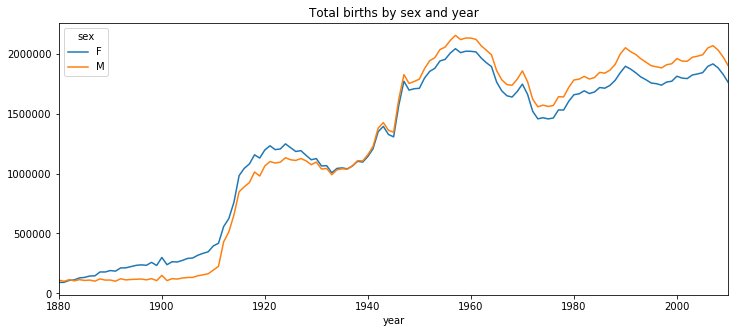

In [261]:
total_births.plot(title='Total births by sex and year')

In [317]:
def add_prop(group):
    # 对每个group做运算
    # Integer division floors
    print("***" * 10)
    print(group.info())
    
    births = group.births.astype(float)
    # births.sum() 是以['year', 'sex']为分组做的sum
    group['prop'] =  births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 941
Data columns (total 5 columns):
name      942 non-null object
sex       942 non-null object
births    942 non-null int64
year      942 non-null int64
prop      942 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 44.2+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 941
Data columns (total 5 columns):
name      942 non-null object
sex       942 non-null object
births    942 non-null int64
year      942 non-null int64
prop      942 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 44.2+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 942 to 1999
Data columns (total 5 columns):
name      1058 non-null object
sex       1058 non-null object
births    1058 non-null int64
year      1058 non-null int64
prop      1058 non-null float64
dty

******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 71699 to 73119
Data columns (total 5 columns):
name      1421 non-null object
sex       1421 non-null object
births    1421 non-null int64
year      1421 non-null int64
prop      1421 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 66.6+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 73120 to 75339
Data columns (total 5 columns):
name      2220 non-null object
sex       2220 non-null object
births    2220 non-null int64
year      2220 non-null int64
prop      2220 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 104.1+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 75340 to 76752
Data columns (total 5 columns):
name      1413 non-null object
sex       1413 non-null object
births    1413 non-null int64
year      1413 non-null int64
prop   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841 entries, 239607 to 244447
Data columns (total 5 columns):
name      4841 non-null object
sex       4841 non-null object
births    4841 non-null int64
year      4841 non-null int64
prop      4841 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 226.9+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5606 entries, 244448 to 250053
Data columns (total 5 columns):
name      5606 non-null object
sex       5606 non-null object
births    5606 non-null int64
year      5606 non-null int64
prop      5606 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 262.8+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 250054 to 254854
Data columns (total 5 columns):
name      4801 non-null object
sex       4801 non-null object
births    4801 non-null int64
year      4801 non-null int64
prop      4801 non-null float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6045 entries, 441381 to 447425
Data columns (total 5 columns):
name      6045 non-null object
sex       6045 non-null object
births    6045 non-null int64
year      6045 non-null int64
prop      6045 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 283.4+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 447426 to 451623
Data columns (total 5 columns):
name      4198 non-null object
sex       4198 non-null object
births    4198 non-null int64
year      4198 non-null int64
prop      4198 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 196.8+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 451624 to 457679
Data columns (total 5 columns):
name      6056 non-null object
sex       6056 non-null object
births    6056 non-null int64
year      6056 non-null int64
prop      6056 non-null float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4736 entries, 678007 to 682742
Data columns (total 5 columns):
name      4736 non-null object
sex       4736 non-null object
births    4736 non-null int64
year      4736 non-null int64
prop      4736 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 222.0+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 682743 to 691446
Data columns (total 5 columns):
name      8704 non-null object
sex       8704 non-null object
births    8704 non-null int64
year      8704 non-null int64
prop      8704 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 408.0+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5037 entries, 691447 to 696483
Data columns (total 5 columns):
name      5037 non-null object
sex       5037 non-null object
births    5037 non-null int64
year      5037 non-null int64
prop      5037 non-null float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8134 entries, 1014910 to 1023043
Data columns (total 5 columns):
name      8134 non-null object
sex       8134 non-null object
births    8134 non-null int64
year      8134 non-null int64
prop      8134 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 381.3+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13863 entries, 1023044 to 1036906
Data columns (total 5 columns):
name      13863 non-null object
sex       13863 non-null object
births    13863 non-null int64
year      13863 non-null int64
prop      13863 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 649.8+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8477 entries, 1036907 to 1045383
Data columns (total 5 columns):
name      8477 non-null object
sex       8477 non-null object
births    8477 non-null int64
year      8477 non-null int64
prop      8477 non-

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 1472701 to 1485907
Data columns (total 5 columns):
name      13207 non-null object
sex       13207 non-null object
births    13207 non-null int64
year      13207 non-null int64
prop      13207 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 619.1+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1485908 to 1505071
Data columns (total 5 columns):
name      19164 non-null object
sex       19164 non-null object
births    19164 non-null int64
year      19164 non-null int64
prop      19164 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 898.3+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13344 entries, 1505072 to 1518415
Data columns (total 5 columns):
name      13344 non-null object
sex       13344 non-null object
births    13344 non-null int64
year      13344 non-null int64
prop    

In [292]:
names.groupby(['year', 'sex'])

In [293]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
prop      1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


In [316]:
names[0:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [320]:
names[942:952]

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
947,Frank,M,3242,1880,0.029341
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2416,1880,0.021866


In [295]:
names.groupby(['year', 'sex']).prop.sum().head()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

In [309]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [336]:
def get_last10(group):
    return group.sort_values(by='births', ascending=True)[:10]
grouped = names.groupby(['year', 'sex'])
last10 = grouped.apply(get_last10)

In [337]:
last10

name sex  births  year      prop
year sex                                               
1880 F   941          Wilma   F       5  1880  0.000055
         862          Estie   F       5  1880  0.000055
         863          Etter   F       5  1880  0.000055
         864        Fronnie   F       5  1880  0.000055
         865          Genie   F       5  1880  0.000055
         866       Georgina   F       5  1880  0.000055
         867          Glenn   F       5  1880  0.000055
         868         Gracia   F       5  1880  0.000055
         869      Guadalupe   F       5  1880  0.000055
         870      Gwendolyn   F       5  1880  0.000055
     M   1999     Zachariah   M       5  1880  0.000045
         1902         Flora   M       5  1880  0.000045
         1901       Fleming   M       5  1880  0.000045
         1900        Firman   M       5  1880  0.000045
         1899      Everette   M       5  1880  0.000045
         1898          Esau   M       5  1880  0.000045
         1897       Erasmus   M       5  1880  0.000045
         1896       Enrique   M       5  1880  0.000045
         1895         Ennis   M       5  1880  0.000045
         1894           Ely   M       5  1880  0.000045
1881 F   2937         Viney   F       5  1881  0.000054
         2857      Eleanore   F       5  1881  0.000054
         2858         Elena   F       5  1881  0.000054
         2859        Elodie   F       5  1881  0.000054
         2860           Ena   F       5  1881  0.000054
         2861         Epsie   F       5  1881  0.000054
         2862          Erna   F       5  1881  0.000054
         2863        Eugene   F       5  1881  0.000054
         2864         Eulah   F       5  1881  0.000054
         2865       Evalena   F       5  1881  0.000054
...                     ...  ..     ...   ...       ...
2009 M   1656945     Zyvion   M       5  2009  0.000003
         1655582  Haroutyun   M       5  2009  0.000003
         1655583      Hason   M       5  2009  0.000003
         1655584    Hassaan   M       5  2009  0.000003
         1655585    Hassiel   M       5  2009  0.000003
         1655586     Haston   M       5  2009  0.000003
         1655587      Havik   M       5  2009  0.000003
         1655588     Hawkin   M       5  2009  0.000003
         1655589  Hawthorne   M       5  2009  0.000003
         1655590    Hayston   M       5  2009  0.000003
2010 F   1676643  Zyrihanna   F       5  2010  0.000003
         1674744   Greenlea   F       5  2010  0.000003
         1674743    Graysie   F       5  2010  0.000003
         1674742    Graycin   F       5  2010  0.000003
         1674741     Graice   F       5  2010  0.000003
         1674740   Gracelee   F       5  2010  0.000003
         1674739  Graceland   F       5  2010  0.000003
         1674738  Graceanna   F       5  2010  0.000003
         1674737     Gitzel   F       5  2010  0.000003
         1674745     Greidi   F       5  2010  0.000003
     M   1690783      Zzyzx   M       5  2010  0.000003
         1689436     Gemari   M       5  2010  0.000003
         1689437   Geoffery   M       5  2010  0.000003
         1689438    Georgiy   M       5  2010  0.000003
         1689439     Gerron   M       5  2010  0.000003
         1689440      Gevon   M       5  2010  0.000003
         1689441     Gevorg   M       5  2010  0.000003
         1689442  Giankarlo   M       5  2010  0.000003
         1689443  Gianpiero   M       5  2010  0.000003
         1689444    Gillian   M       5  2010  0.000003

[2620 rows x 5 columns]

In [353]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
#     print(year)
#     print(group)
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [354]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261877 entries, 0 to 261876
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.0+ MB


In [355]:
top1000[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [356]:
top1000.index

RangeIndex(start=0, stop=261877, step=1)

In [357]:
top1000.index = np.arange(len(top1000))

In [358]:
top1000.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            261867, 261868, 261869, 261870, 261871, 261872, 261873, 261874,
            261875, 261876],
           dtype='int64', length=261877)

In [359]:
len(top1000)

261877

In [360]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261877 entries, 0 to 261876
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.0+ MB


### Analyzing naming trends

In [361]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [366]:
(top1000.sex=='M')[935:945]

935    False
936    False
937    False
938    False
939    False
940    False
941    False
942     True
943     True
944     True
Name: sex, dtype: bool

In [367]:
boys.head()

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392


In [368]:
girls.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [393]:
total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births[:10]

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x146254f50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12abeb690>], dtype=object)

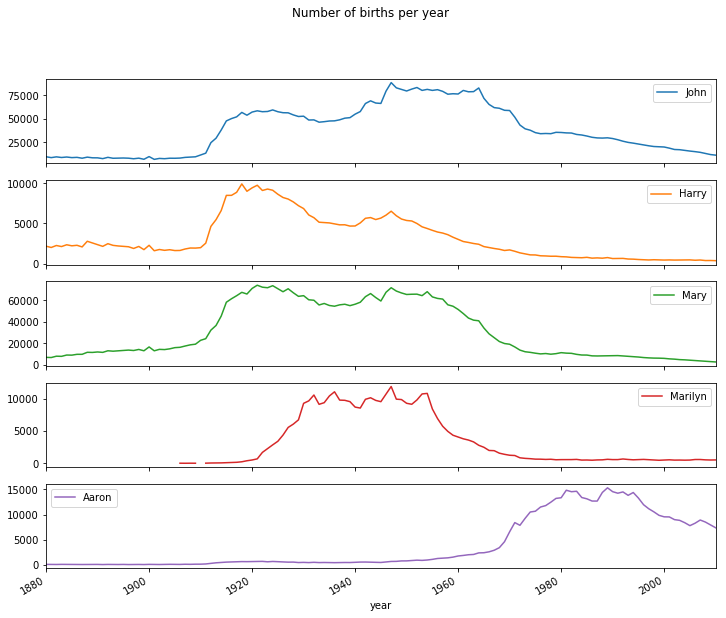

In [394]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn', 'Aaron']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

In [395]:
total_births[['John']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Data columns (total 1 columns):
John    131 non-null float64
dtypes: float64(1)
memory usage: 2.0 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14ba74e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1685f7390>], dtype=object)

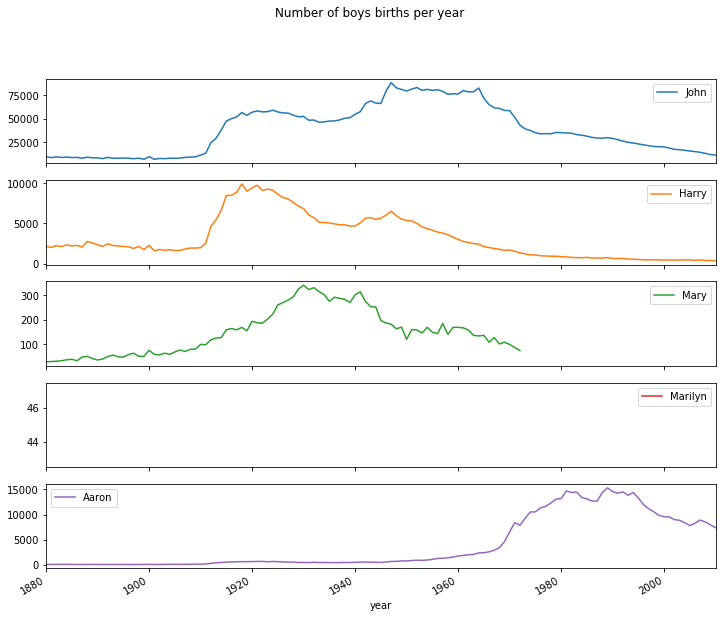

In [399]:
boys_births = boys.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
subset = boys_births[['John', 'Harry', 'Mary', 'Marilyn', 'Aaron']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of boys births per year")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x167896b10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1669502d0>], dtype=object)

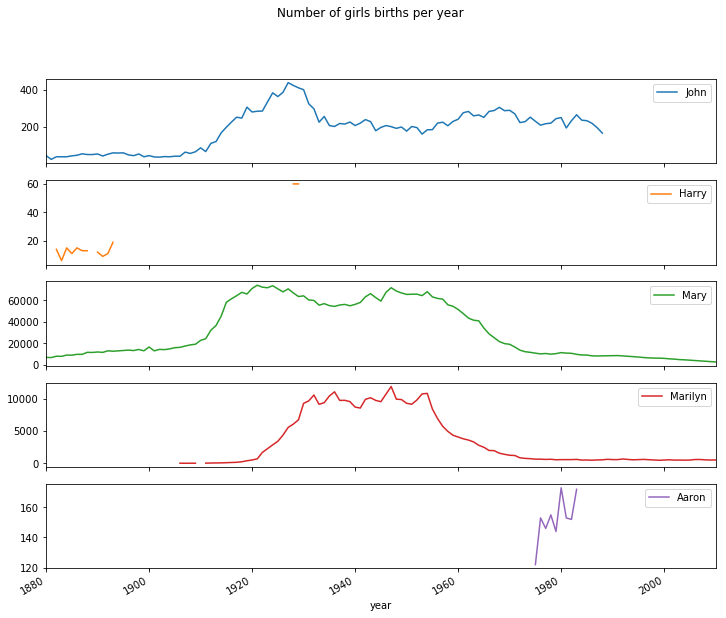

In [400]:
girls_births = girls.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
subset = girls_births[['John', 'Harry', 'Mary', 'Marilyn', 'Aaron']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of girls births per year")

#### Measuring the increase in naming diversity

In [401]:
plt.figure()

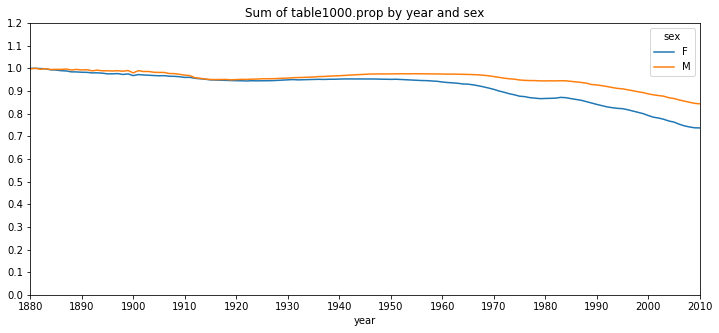

In [403]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [404]:
table[:10]

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


In [430]:
df = boys[boys.year == 2010]
df.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 260877 to 261876
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [413]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()  # 累计和

prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [415]:
prop_cumsum.values.searchsorted(0.5)

116

In [417]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [441]:
top1000.head()

,name,sex,births,year,prop,extra
0,Mary,F,7065,1880,0.077643,0
1,Anna,F,2604,1880,0.028618,0
2,Emma,F,2003,1880,0.022013,0
3,Elizabeth,F,1939,1880,0.021309,0
4,Minnie,F,1746,1880,0.019188,0


In [444]:
def get_quantile_count(group, q=0.5):
    """https://stackoverflow.com/questions/21390035/python-pandas-groupby-object-apply-method-duplicates-first-group"""
    group = group.sort_values(by='prop', ascending=False)
    r = group.prop.cumsum().values.searchsorted(q) + 1
    return r

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
print(diversity[0:10])
diversity = diversity.unstack('sex')
print('*' * 100)
print(diversity[:10])

year  sex
1880  F      38
      M      14
1881  F      38
      M      14
1882  F      38
      M      15
1883  F      39
      M      15
1884  F      39
      M      16
dtype: int64
****************************************************************************************************
sex    F   M
year        
1880  38  14
1881  38  14
1882  38  15
1883  39  15
1884  39  16
1885  40  16
1886  41  16
1887  41  17
1888  42  17
1889  43  18


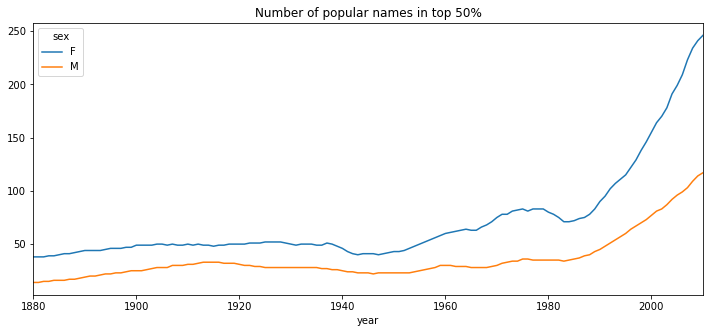

In [445]:
diversity.plot(title="Number of popular names in top 50%")

#### The "Last letter" Revolution

In [459]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
print(last_letters)
table = names.pivot_table('births', index=last_letters,  # Keys to group by on the pivot table index.
                          columns=['sex', 'year'], aggfunc=sum)

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1690754    n
1690755    n
1690756    n
1690757    n
1690758    l
1690759    n
1690760    a
1690761    o
1690762    h
1690763    i
1690764    h
1690765    n
1690766    r
1690767    n
1690768    n
1690769    n
1690770    n
1690771    i
1690772    n
1690773    b
1690774    e
1690775    t
1690776    n
1690777    r
1690778    n
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object


In [460]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, a to z
Columns: 262 entries, (F, 1880) to (M, 2010)
dtypes: float64(262)
memory usage: 53.4+ KB


In [461]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [468]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()


sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [469]:
subtablex = table.reindex(columns=['F'], level='sex')
subtablex.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                       ...                         \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...     673418.0  681001.0   
b                NaN      NaN      NaN    ...        394.0     332.0   
c                NaN      NaN      NaN    ...        539.0     607.0   
d             1027.0   1298.0   1374.0    ...       4511.0    4082.0   
e            54353.0  66750.0  66663.0    ...     316007.0  315736.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a            702628.0  710441.0  727357.0  753391.0  752779.0  723405.0   
b               344.0     601.0     369.0     367.0     409.0     408.0   
c               649.0     663.0     613.0     633.0     775.0     926.0   
d              3764.0    3763.0    3565.0    3600.0    3355.0    3239.0   
e            322199.0  323747.0  322305.0  330236.0  334422.0  332752.0   

sex                              
year             2009      2010  
last_letter                      
a            698477.0  670605.0  
b               435.0     450.0  
c               931.0     946.0  
d              2864.0    2607.0  
e            322682.0  313833.0  

[5 rows x 131 columns]

In [470]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [471]:
letter_prop = subtable / subtable.sum().astype(float)

In [472]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

In [485]:
letter_prop.info()
letter_prop['M'].info()


<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, a to z
Data columns (total 6 columns):
(F, 1910)    21 non-null float64
(F, 1960)    24 non-null float64
(F, 2010)    26 non-null float64
(M, 1910)    24 non-null float64
(M, 1960)    24 non-null float64
(M, 2010)    26 non-null float64
dtypes: float64(6)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, a to z
Data columns (total 3 columns):
1910    24 non-null float64
1960    24 non-null float64
2010    26 non-null float64
dtypes: float64(3)
memory usage: 2.1+ KB


In [486]:
letter_prop['M'].head()

year,1910,1960,2010
last_letter,,,
a,0.005031,0.002440,0.014980
b,0.002116,0.001834,0.020470
c,0.002482,0.007257,0.012181
d,0.113858,0.122908,0.023387
e,0.147556,0.083853,0.067959


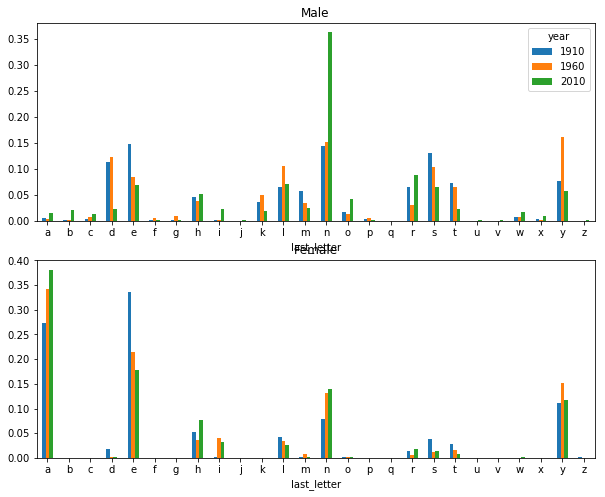

In [491]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [492]:
plt.subplots_adjust(hspace=0.25)

In [506]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [507]:
plt.close('all')

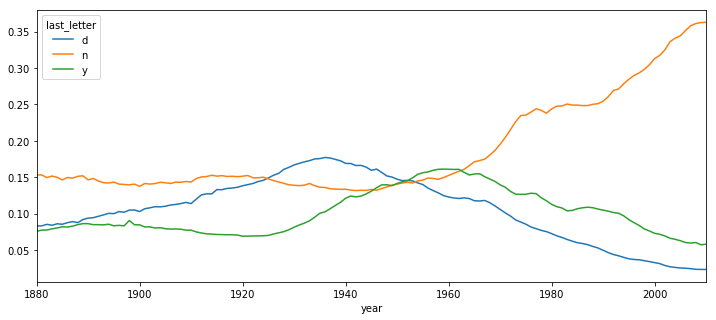

In [508]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [511]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
print(mask)
lesley_like = all_names[mask]
lesley_like

[False False False ..., False False False]


array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [513]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [515]:
filtered.head()

,name,sex,births,year,prop,extra
632,Leslie,F,8,1880,0.000088,0
1108,Leslie,M,79,1880,0.000715,0
2462,Leslie,F,11,1881,0.000120,0
3014,Leslie,M,92,1881,0.000913,0
4512,Leslie,F,9,1882,0.000083,0


In [548]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table.head()


sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [549]:
table.sum(1)[:5] # 沿列求和

year
1880     87.0
1881    103.0
1882    137.0
1883    132.0
1884    140.0
dtype: float64

In [557]:
new_table = table.div(table.sum(1), axis=0)  # 沿行做除法
new_table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [558]:
plt.close('all')

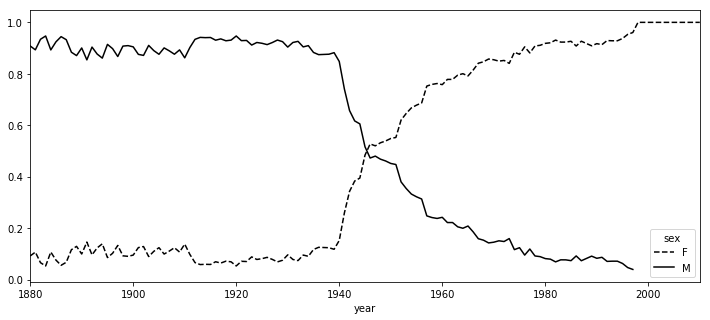

In [559]:
new_table.plot(style={'M': 'k-', 'F': 'k--'})